In [41]:
from hydra.core.global_hydra import GlobalHydra
from hydra import initialize_config_dir, compose
import pandas as pd
from pathlib import Path
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import json

# Initialize Hydra with the config path
GlobalHydra.instance().clear()
initialize_config_dir(config_dir="/home/ta-tldr/Project/tldr/config/", version_base=None)
cfg = compose(config_name="AIVideoConf.yaml")
paperlist_root = cfg.AIConfVideo.paperlist_root
video_root = paperlist_root + "video/"

# per_token = True
per_token = False

# load csv file
tldr_df_comp = pd.read_csv(Path(video_root, "tldr_mutual_info_video_text.csv"))
tldr_df_info = pd.read_csv(Path(video_root, "tldr_mutual_info_text_task.csv"))
abs_df_comp = pd.read_csv(Path(video_root, "abstract_mutual_info_video_text.csv"))
abs_df_info = pd.read_csv(Path(video_root, "abstract_mutual_info_text_task.csv"))
aware_df_comp = pd.read_csv(Path(video_root, "aware_mutual_info_video_text.csv"))
aware_df_info = pd.read_csv(Path(video_root, "aware_mutual_info_text_task.csv"))
agnostic_df_comp = pd.read_csv(Path(video_root, "agnostic_mutual_info_video_text.csv"))
agnostic_df_info = pd.read_csv(Path(video_root, "agnostic_mutual_info_text_task.csv"))
response0_df_comp = pd.read_csv(Path(video_root, "response0_mutual_info_video_text.csv"))
response0_df_info = pd.read_csv(Path(video_root, "response0_mutual_info_text_task.csv"))
response1_df_comp = pd.read_csv(Path(video_root, "response1_mutual_info_video_text.csv"))
response1_df_info = pd.read_csv(Path(video_root, "response1_mutual_info_text_task.csv"))
response2_df_comp = pd.read_csv(Path(video_root, "response2_mutual_info_video_text.csv"))
response2_df_info = pd.read_csv(Path(video_root, "response2_mutual_info_text_task.csv"))
CoT_df_comp = pd.read_csv(Path(video_root, "CoT_mutual_info_video_text.csv"))
CoT_df_info = pd.read_csv(Path(video_root, "CoT_mutual_info_text_task.csv"))

In [42]:
# Filter out rows with -10 in logprob_text or logprob
def filter_logprob(df_info, threshold=-10):
    return (df_info['logprob_text'] > threshold) & (df_info['logprob'] > threshold)

# Apply the function to each dataframe
filtered_rows = (
    filter_logprob(tldr_df_info) &
    filter_logprob(abs_df_info) &
    filter_logprob(aware_df_info) &
    filter_logprob(agnostic_df_info) &
    filter_logprob(response0_df_info) &
    filter_logprob(response1_df_info) &
    filter_logprob(response2_df_info)
    # filter_logprob(CoT_df_info)
)

# Filter out rows without videos
excluded_ids = ['pPh9p8anUi', 't7wvJstsiV', 'kXErlJSZ84', 'jJCeMiwHdH', 'kVr3L73pNH', 'S3HvA808gk', 'rvUq3cxpDF', 'oLLZhbBSOU', 'JjQl8hXJAS', 'gvlOQC6oP1', 'QgaGs7peYe']
filtered_rows &= ~tldr_df_info['openreview_id'].isin(excluded_ids)

tldr_df_info_filtered = tldr_df_info[filtered_rows]
abs_df_info_filtered = abs_df_info[filtered_rows]
aware_df_info_filtered = aware_df_info[filtered_rows]
agnostic_df_info_filtered = agnostic_df_info[filtered_rows]
CoT_df_info_filtered = CoT_df_info[filtered_rows]
response0_df_info_filtered = response0_df_info[filtered_rows]
response1_df_info_filtered = response1_df_info[filtered_rows]
response2_df_info_filtered = response2_df_info[filtered_rows]

print(f"Number of unique entries in tldr_df_info_filtered: {len(tldr_df_info_filtered['openreview_id'].unique())}")

Number of unique entries in tldr_df_info_filtered: 95


In [43]:
# sample 10 unique openreview_id from below list with fixed seed for reproducibility
np.random.seed(0)  # Set fixed seed for reproducible sampling
sampled_ids = np.random.choice(tldr_df_info_filtered['openreview_id'].unique(), size=10, replace=False)
print(f"sampled_ids: {sampled_ids}")

# Create filtered dataframes by directly filtering on the sampled IDs
# This avoids the "Boolean Series key will be reindexed" warning
tldr_df_info_filtered = tldr_df_info_filtered[tldr_df_info_filtered['openreview_id'].isin(sampled_ids)]
abs_df_info_filtered = abs_df_info_filtered[abs_df_info_filtered['openreview_id'].isin(sampled_ids)]
aware_df_info_filtered = aware_df_info_filtered[aware_df_info_filtered['openreview_id'].isin(sampled_ids)]
agnostic_df_info_filtered = agnostic_df_info_filtered[agnostic_df_info_filtered['openreview_id'].isin(sampled_ids)]
CoT_df_info_filtered = CoT_df_info_filtered[CoT_df_info_filtered['openreview_id'].isin(sampled_ids)]
response0_df_info_filtered = response0_df_info_filtered[response0_df_info_filtered['openreview_id'].isin(sampled_ids)]
response1_df_info_filtered = response1_df_info_filtered[response1_df_info_filtered['openreview_id'].isin(sampled_ids)]
response2_df_info_filtered = response2_df_info_filtered[response2_df_info_filtered['openreview_id'].isin(sampled_ids)]

sampled_ids: ['JW3jTjaaAB' 'u7JRmrGutT' 'BifeBRhikU' 'MEGQGNUfPx' 'XcbgkjWSJ7'
 'L3RYBqzRmF' '2nisrxMMQR' 'wblxm5zdkE' 'wg8NPfeMF9' '2UnCj3jeao']


In [44]:
aware_df_info_filtered[['openreview_id', 'predicted_answer']]

,openreview_id,predicted_answer
4,JW3jTjaaAB,C
16,XcbgkjWSJ7,D
26,MEGQGNUfPx,G
46,u7JRmrGutT,C
49,wg8NPfeMF9,L
78,BifeBRhikU,B
88,L3RYBqzRmF,F
90,2nisrxMMQR,G
118,2UnCj3jeao,B
119,wblxm5zdkE,I


In [45]:
def calculate_info_scores(df_info_filtered):
    log_info_scores = []
    info_ranks = []
    for openreview_id in df_info_filtered['openreview_id']:
        row = df_info_filtered[df_info_filtered['openreview_id'] == openreview_id]
        info_score = row['informativeness_score'].values[0]
        log_info_scores.append(info_score)
        info_ranks.append(row["logprob_text"].values[0] - row["logprob"].values[0])
    return log_info_scores, info_ranks

tldr_log_info_scores, tldr_info_ranks = calculate_info_scores(tldr_df_info_filtered)
abs_log_info_scores, abs_info_ranks = calculate_info_scores(abs_df_info_filtered)
aware_log_info_scores, aware_info_ranks = calculate_info_scores(aware_df_info_filtered)
agnostic_log_info_scores, agnostic_info_ranks = calculate_info_scores(agnostic_df_info_filtered)
CoT_log_info_scores, CoT_info_ranks = calculate_info_scores(CoT_df_info_filtered)
response0_log_info_scores, response0_info_ranks = calculate_info_scores(response0_df_info_filtered)
response1_log_info_scores, response1_info_ranks = calculate_info_scores(response1_df_info_filtered)
response2_log_info_scores, response2_info_ranks = calculate_info_scores(response2_df_info_filtered)


def initialize_dataframe():
    columns = ['openreview_id', 'predicted_word_video', 'predicted_word', 'orig_word', 'complexity_score', 'rank_video', 'rank']
    dtypes = {
        'openreview_id': 'str', 
        'predicted_word_video': 'object',
        'predicted_word': 'object',        
        'orig_word': 'object',             
        'complexity_score': 'float', 
        'rank_video': 'object',            
        'rank': 'object'                   
    }
    return pd.DataFrame(columns=columns).astype(dtypes)

def calculate_comp_scores(df_info_filtered, df_comp):
    df_comp_total = initialize_dataframe()
    log_comp_scores = []
    comp_ranks = []
    max_id, min_id = None, None
    max_diff, min_diff = -100, 100
    num_tokens = []
    
    for openreview_id in df_info_filtered['openreview_id'].unique():
        row = df_comp[df_comp['openreview_id'] == openreview_id]
        if per_token:
            diff_count = len(row)
        else:
            diff_count = 1  # Placeholder value
        diff = row['diff'].sum()
        if diff == 0:
            print(f"Diff is 0 for openreview_id: {openreview_id}. This might be due to no video.")
            # continue
        
        log_comp_scores.append(diff / diff_count)
        comp_ranks.append(row['logprob_video'].values[0] - row['logprob'].values[0])
        num_tokens.append(diff_count)
        
        if diff > max_diff:
            max_diff = diff
            max_id = openreview_id
        if diff < min_diff:
            min_diff = diff
            min_id = openreview_id
        
        new_row = pd.DataFrame({
            'openreview_id': [openreview_id], 
            'predicted_word_video': [row['predicted_word_video'].values], 
            'predicted_word': [row['predicted_word'].values], 
            'orig_word': [row['orig_word'].values], 
            'complexity_score': [diff / diff_count], 
            'rank_video': [row['rank_video'].values], 
            'rank': [row['rank'].values]
        })
        df_comp_total = pd.concat([df_comp_total, new_row], ignore_index=True)
    
    return df_comp_total, log_comp_scores, comp_ranks, max_id, min_id, num_tokens

tldr_df_comp_total, tldr_log_comp_scores, tldr_comp_ranks, tldr_max_id, tldr_min_id, tldr_num_tokens = calculate_comp_scores(tldr_df_info_filtered, tldr_df_comp)
abs_df_comp_total, abs_log_comp_scores, abs_comp_ranks, abs_max_id, abs_min_id, abs_num_tokens = calculate_comp_scores(abs_df_info_filtered, abs_df_comp)
aware_df_comp_total, aware_log_comp_scores, aware_comp_ranks, _, _, _ = calculate_comp_scores(aware_df_info_filtered, aware_df_comp)
agnostic_df_comp_total, agnostic_log_comp_scores, agnostic_comp_ranks, _, _, _ = calculate_comp_scores(agnostic_df_info_filtered, agnostic_df_comp)
CoT_df_comp_total, CoT_log_comp_scores, CoT_comp_ranks, _, _, _ = calculate_comp_scores(CoT_df_info_filtered, CoT_df_comp)
response0_df_comp_total, response0_log_comp_scores, response0_comp_ranks, _, _, _ = calculate_comp_scores(response0_df_info_filtered, response0_df_comp)
response1_df_comp_total, response1_log_comp_scores, response1_comp_ranks, _, _, _ = calculate_comp_scores(response1_df_info_filtered, response1_df_comp)
response2_df_comp_total, response2_log_comp_scores, response2_comp_ranks, _, _, _ = calculate_comp_scores(response2_df_info_filtered, response2_df_comp)

Diff is 0 for openreview_id: BifeBRhikU. This might be due to no video.
Diff is 0 for openreview_id: wblxm5zdkE. This might be due to no video.


In [46]:
# Add a 'group' column to each DataFrame before concatenation
aware_df_info_filtered = aware_df_info_filtered.copy().drop(columns=["predicted_answer_text", "predicted_answer"])
agnostic_df_info_filtered = agnostic_df_info_filtered.copy().drop(columns=["predicted_answer_text", "predicted_answer"])
response0_df_info_filtered = response0_df_info_filtered.copy().drop(columns=["predicted_answer_text", "predicted_answer"])
response1_df_info_filtered = response1_df_info_filtered.copy().drop(columns=["predicted_answer_text", "predicted_answer"])
response2_df_info_filtered = response2_df_info_filtered.copy().drop(columns=["predicted_answer_text", "predicted_answer"])

aware_df_info_filtered.loc[:, 'group'] = 'aware'
agnostic_df_info_filtered.loc[:, 'group'] = 'agnostic'
response0_df_info_filtered.loc[:, 'group'] = 'response0'
response1_df_info_filtered.loc[:, 'group'] = 'response1'
response2_df_info_filtered.loc[:, 'group'] = 'response2'

# Then concatenate as before
merged_info_df = pd.concat([aware_df_info_filtered, agnostic_df_info_filtered, response0_df_info_filtered, response1_df_info_filtered, response2_df_info_filtered], ignore_index=True)
merged_info_df = merged_info_df.sort_values(by=['openreview_id', 'group'])



# add a 'group' column to each dataframe
aware_df_comp_total.loc[:, 'group'] = 'aware'
agnostic_df_comp_total.loc[:, 'group'] = 'agnostic'
response0_df_comp_total.loc[:, 'group'] = 'response0'
response1_df_comp_total.loc[:, 'group'] = 'response1'
response2_df_comp_total.loc[:, 'group'] = 'response2'

# then concatenate as before
merged_complexity_df = pd.concat([aware_df_comp_total, agnostic_df_comp_total, response0_df_comp_total, response1_df_comp_total, response2_df_comp_total], ignore_index=True)
merged_complexity_df = merged_complexity_df.sort_values(by=['openreview_id', 'group'])

# merge the rows of the two dataframes with the same openreview_id and group
ib_df = pd.merge(merged_complexity_df, merged_info_df, on=['openreview_id', 'group'], how='inner')
ib_df = ib_df.sort_values('openreview_id', ascending=True)

# create a new column for the informativeness score difference for each beta
alpha_betas = [(1, 0), (-1, 0), (0, 1)]
alpha_betas += [(-0.02, 1), (-0.05, 1), (-0.1, 1), (-0.3, 1)]
alpha_betas += [(0.02, 1), (0.05, 1), (0.1, 1), (0.3, 1)]
max_ib_dfs = []
max_ib_labels = []
for idx, ab in enumerate(alpha_betas):
    a, b = ab
    max_ib_labels.append(f'Max IB ($\\alpha,\\beta=({a},{b})$)')
    ib_df[f'ib_score_beta_{ab}'] = a * ib_df['complexity_score'] + b * ib_df['informativeness_score']
    # ascending=False to get the max score
    max_ib_dfs.append(ib_df.sort_values(f'ib_score_beta_{ab}', ascending=False).drop_duplicates('openreview_id').reset_index(drop=True))
    # ib_df.drop(columns=[f'ib_score_beta_{ab}'], inplace=True)


In [47]:
# Create a list of column names to select
columns = ['openreview_id', 'group', 'ib_score_beta_(0, 1)', 'ib_score_beta_(1, 0)']
# Select the columns from the dataframe
ib_df_pruned = ib_df[ib_df['group'].isin(['aware', 'agnostic', 'response0', 'response1', 'response2'])][columns]

# only keep the row in each openreview_id with the max ib score
max_i_df = ib_df_pruned.sort_values(by='ib_score_beta_(0, 1)', ascending=False).drop_duplicates('openreview_id').reset_index(drop=True)
max_c_df = ib_df_pruned.sort_values(by='ib_score_beta_(1, 0)', ascending=False).drop_duplicates('openreview_id').reset_index(drop=True)

### Plotting

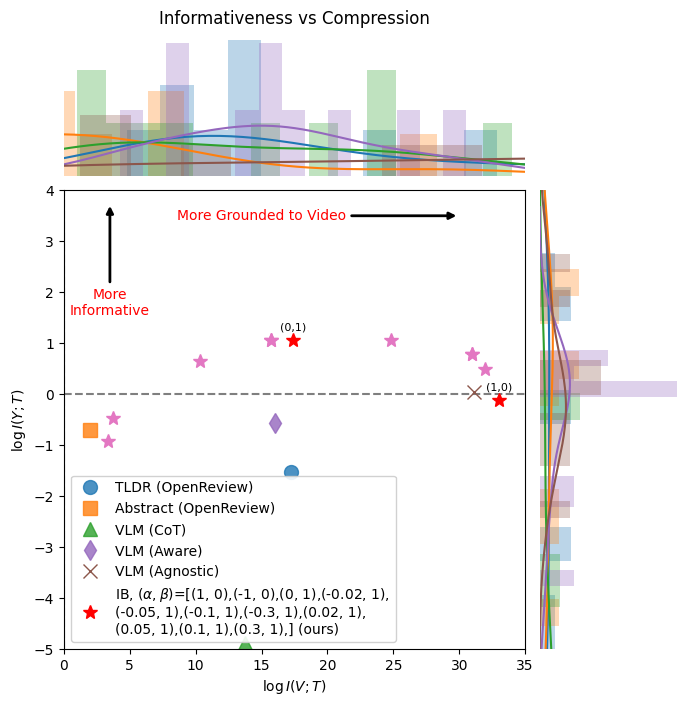

In [48]:
def plot_informativeness_vs_compression(data_groups, alpha_betas, visible):
    # Create a grid layout with space for histograms
    fig = plt.figure(figsize=(8, 8))
    gs = GridSpec(4, 4, figure=fig, wspace=0.1, hspace=0.1)
    scatter_ax = fig.add_subplot(gs[1:4, 0:3])  # Main scatter plot
    x_hist_ax = fig.add_subplot(gs[0, 0:3], sharex=scatter_ax)  # X-axis histograms
    y_hist_ax = fig.add_subplot(gs[1:4, 3], sharey=scatter_ax)  # Y-axis histograms



    # Create scatter plots and histograms for each group
    ib_legend = False
    for label, group_data in data_groups.items():
        if label == 'CoT':
            label_latex = "VLM (CoT)"
        elif label in ['VLM (Agnostic)', 'VLM (Aware)']:
            label_latex = label
        elif label in ['TLDR', 'Abstract']:
            label_latex = label + " (OpenReview)"
        elif "Max IB" in label and not ib_legend:
            label_latex = "IB, $(\\alpha, \\beta)$=["
            for idx, ab in enumerate(alpha_betas):
                label_latex += f"{ab},"
                if idx % 4 == 3:
                    label_latex += '\n'
            label_latex += "] (ours)"
            ib_legend = True
        else:
            label_latex = ""
        
        # Error bars with standard deviation
        x_pos = np.mean(group_data['x'])
        y_pos = np.mean(group_data['y'])

        # Add alpha-beta values as text above IB points
        if visible[label] and "Max IB" in label and ("(0,1)" in label or "(1,0)" in label):
            # Extract the alpha-beta value from the label
            ab_value = label.split('=')[1].split('$')[0]
            scatter_ax.annotate(ab_value, 
                               (x_pos, y_pos), 
                               xytext=(0, 7),  # Offset text 7 points above
                               textcoords='offset points',
                               ha='center', 
                               fontsize=8)
            scatter_ax.errorbar(
                x_pos, y_pos,
                # xerr=np.std(group_data['x']), yerr=np.std(group_data['y']),
                fmt=group_data['marker'], color='red', 
                elinewidth=1.5, capsize=8, alpha=group_data['alpha'], label=label_latex,
                markersize=10  # Increased marker size
            ) if visible[label] else None
        else:
            scatter_ax.errorbar(
                x_pos, y_pos,
                # xerr=np.std(group_data['x']), yerr=np.std(group_data['y']),
                fmt=group_data['marker'], color=group_data['color'], 
                elinewidth=1.5, capsize=8, alpha=group_data['alpha'], label=label_latex,
                markersize=10  # Increased marker size
            ) if visible[label] else None
        

        
        # Histograms
        if visible[label] and label in ['TLDR', 'Abstract', 'CoT', 'Max IB ($\\beta=0.3$)', 'VLM (Agnostic)', 'VLM (Aware)']:
            # For x-axis histogram
            x_hist_ax.hist(group_data['x'], bins=15, alpha=0.3, color=group_data['color'], density=True)
            sns.kdeplot(
                data=group_data,
                x = 'x',
                ax=x_hist_ax,
                color=group_data['color'],
                alpha=1
            )
            
            # For y-axis histogram
            y_hist_ax.hist(group_data['y'], bins=15, orientation='horizontal', alpha=0.3, color=group_data['color'], density=True)
            sns.kdeplot(
                data=group_data,
                y = 'y',
                ax=y_hist_ax,
                color=group_data['color'],
                alpha=1
            )

    # Add x=0 and y=0 lines
    scatter_ax.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    scatter_ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    scatter_ax.set_xlabel('$\log I(V;T)$ ') # negative complexity score
    scatter_ax.set_ylabel('$\log I(Y;T)$ ') # informativeness score
    scatter_ax.set_title('Informativeness vs Compression', pad=120)
    scatter_ax.set_xlim(0, 35)
    scatter_ax.set_ylim(-5, 4)

    # Add a vertical arrow pointing upwards with text above it
    scatter_ax.annotate('More\nInformative',
                        xy=(3.5, 3.75),  # Arrow tip
                        xytext=(3.5, 1.5),  # Arrow tail (lower position for upward direction)
                        arrowprops=dict(color='black', arrowstyle='-|>', lw=2),
                        fontsize=10, color='red',
                        ha='center',  # Center text horizontally
                        va='bottom')  # Ensure text is above the arrow
    # Add a horizontal arrow pointing left with text above it
    scatter_ax.annotate('More Grounded to Video',
                        xy=(30, 3.5),  # Arrow tip (further left)
                        xytext=(15, 3.5),  # Arrow tail (even further left)
                        arrowprops=dict(color='black', arrowstyle='-|>', lw=2),
                        fontsize=10, color='red',
                        ha='center',  # Align text to the right (places it left of the arrow)
                        va='center')  # Vertically center the text


    # Turn off axes for histograms
    x_hist_ax.axis('off')
    y_hist_ax.axis('off')

    # Add legend
    scatter_ax.legend(frameon=True, framealpha=0.9, loc='lower left')

    plt.show()

# Sample a total of 6 colors, markers, and opacity values
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#d62728', '#e377c2', '#7f7f7f']
markers = ['o', 's', '^', 'd', 'x', 'P', '*', '+']
opacity = [0.8, 0.8, 0.8, 0.8, 1, 1, 1, 1]

# Define data groups
data_groups = {
    'TLDR': {
        'x': tldr_log_comp_scores,
        'y': tldr_log_info_scores,
        'color': colors[0],
        'marker': markers[0],
        'alpha': opacity[0]
    },
    'Abstract': {
        'x': abs_log_comp_scores,
        'y': abs_log_info_scores,
        'color': colors[1],
        'marker': markers[1],
        'alpha': opacity[1]
    },
    'CoT': {
        'x': CoT_log_comp_scores,
        'y': CoT_log_info_scores,
        'color': colors[2],
        'marker': markers[2],
        'alpha': opacity[2]
    },
    'VLM (Aware)': {
        'x': aware_log_comp_scores,
        'y': aware_log_info_scores,
        'color': colors[3],
        'marker': markers[3],
        'alpha': opacity[3]
    },
    'VLM (Agnostic)': {
        'x': agnostic_log_comp_scores,
        'y': agnostic_log_info_scores,
        'color': colors[4],
        'marker': markers[4],
        'alpha': opacity[4]
    },
}
for idx, label in enumerate(max_ib_labels):
    data_groups[label] = {
        'x': max_ib_dfs[idx]['complexity_score'],
        'y': max_ib_dfs[idx]['informativeness_score'],
        'color': colors[6],
        'marker': markers[6],
        'alpha': opacity[6]
    }

# Define visibility of each group
visible = {
    'TLDR': True,
    'Abstract': True,
    'VLM (Aware)': True,
    'VLM (Agnostic)': True,
    'CoT': True
}
for label in max_ib_labels:
    visible[label] = True

plot_informativeness_vs_compression(data_groups, alpha_betas, visible)

### Length vs. Informativeness

In [49]:
# load response length data
length_df = pd.read_csv(Path(paperlist_root, "dataset", "vlm_response_length.csv")) #.drop(columns=["response"])
length_df = length_df[length_df['openreview_id'].isin(tldr_df_info_filtered['openreview_id'])]

tldr_length = length_df[length_df['group'] == 'tldr']
abs_length = length_df[length_df['group'] == 'abstract']
CoT_length = length_df[length_df['group'] == 'CoT']
aware_length = length_df[length_df['group'] == 'aware']
agnostic_length = length_df[length_df['group'] == 'agnostic']
# IB filtering
length_df = length_df[length_df["group"].isin(["response0", "response1", "response2", "aware", "agnostic"])]
length_ib_dfs = []
for idx, ab in enumerate(alpha_betas):
    length_df = pd.merge(length_df, max_ib_dfs[idx][['openreview_id', f'ib_score_beta_{ab}']], on='openreview_id', how='inner')
    length_ib_dfs.append(length_df.sort_values(f'ib_score_beta_{ab}', ascending=False).drop_duplicates('openreview_id').reset_index(drop=True))
    length_df.drop(columns=[f'ib_score_beta_{ab}'], inplace=True)

# print(length_df.sort_values(by='openreview_id').head(10))

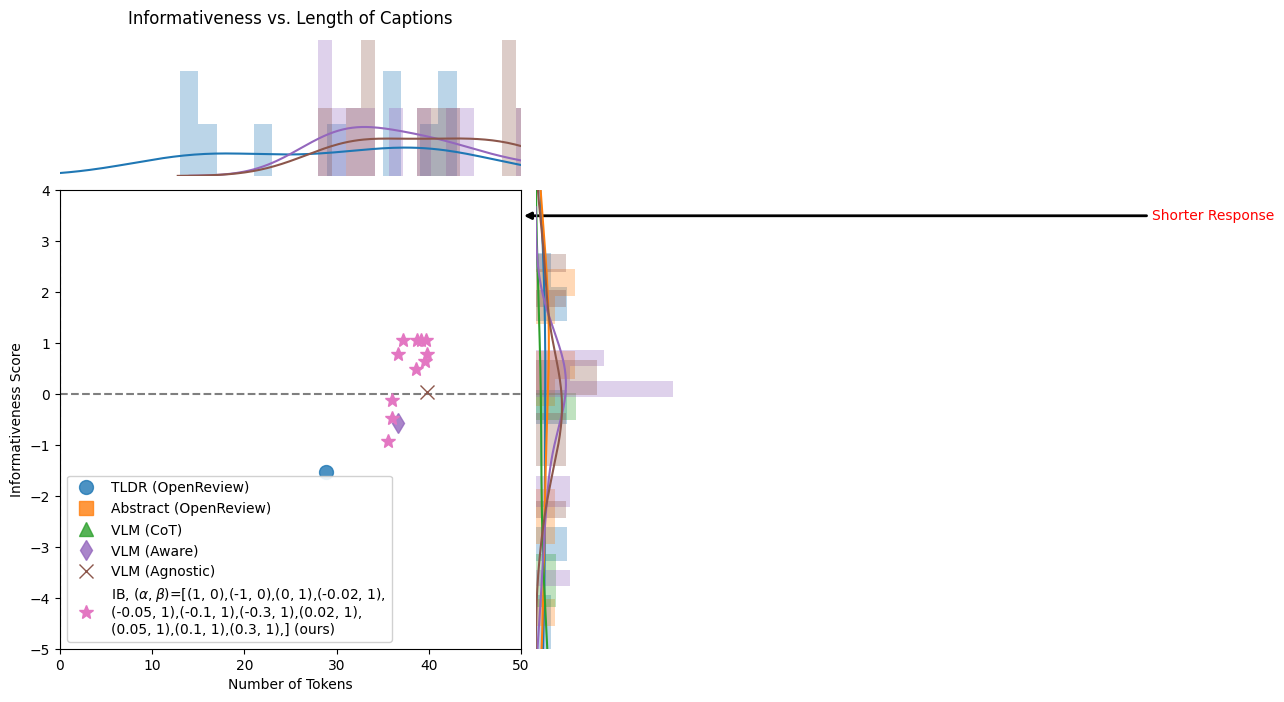

In [50]:
# Define data groups
data_groups_length = {
    'TLDR': {
        'x': tldr_length["length"],
        'y': tldr_log_info_scores,
        'color': colors[0],
        'marker': markers[0],
        'alpha': opacity[0]
    },
    'Abstract': {
        'x': abs_length["length"],
        'y': abs_log_info_scores,
        'color': colors[1],
        'marker': markers[1],
        'alpha': opacity[1]
    },
    'CoT': {
        'x': CoT_length["length"],
        'y': CoT_log_info_scores,
        'color': colors[2],
        'marker': markers[2],
        'alpha': opacity[2]
    },
    'VLM (Aware)': {
        'x': aware_length["length"],
        'y': aware_log_info_scores,
        'color': colors[3],
        'marker': markers[3],
        'alpha': opacity[3]
    },
    'VLM (Agnostic)': {
        'x': agnostic_length["length"],
        'y': agnostic_log_info_scores,
        'color': colors[4],
        'marker': markers[4],
        'alpha': opacity[4]
    },
}
for idx, label in enumerate(max_ib_labels):
    data_groups_length[label] = {
        'x': length_ib_dfs[idx]['length'],
        'y': max_ib_dfs[idx]['informativeness_score'],
        'color': colors[6],
        'marker': markers[6],
        'alpha': opacity[6]
    }

# Create a grid layout with space for histograms
fig = plt.figure(figsize=(8, 8))
gs = GridSpec(4, 4, figure=fig, wspace=0.1, hspace=0.1)
scatter_ax = fig.add_subplot(gs[1:4, 0:3])  # Main scatter plot
x_hist_ax = fig.add_subplot(gs[0, 0:3], sharex=scatter_ax)  # X-axis histograms
y_hist_ax = fig.add_subplot(gs[1:4, 3], sharey=scatter_ax)  # Y-axis histograms

ib_legend = False
for label, group_data in data_groups_length.items():
    if label == 'CoT':
        label_latex = "VLM (CoT)"
    elif label in ['VLM (Agnostic)', 'VLM (Aware)']:
        label_latex = label
    elif label in ['TLDR', 'Abstract']:
        label_latex = label + " (OpenReview)"
    elif "Max IB" in label and not ib_legend:
        label_latex = "IB, $(\\alpha, \\beta)$=["
        for idx, ab in enumerate(alpha_betas):
            label_latex += f"{ab},"
            if idx % 4 == 3:
                label_latex += '\n'
        label_latex += "] (ours)"
        ib_legend = True
    else:
        label_latex = ""

    # Main scatter plot
    # scatter_ax.scatter(
    #     group_data['x'], group_data['y'],
    #     color=group_data['color'], marker=group_data['marker'],
    #     label=label, alpha=group_data['alpha']
    # ) if visible[label] else None

    # Error bars with standard deviation
    scatter_ax.errorbar(
        np.mean(group_data['x']), np.mean(group_data['y']),
        # xerr=np.std(group_data['x']), yerr=np.std(group_data['y']),
        fmt=group_data['marker'], color=group_data['color'],
        elinewidth=1.5, capsize=8, alpha=group_data['alpha'], label=label_latex,
        markersize=10  # Increased marker size
    ) if visible[label] else None
    # Histograms
    if visible[label] and label in ['TLDR', 'Abstract', 'CoT', 'Max IB ($\\beta=0.3$)', 'VLM (Agnostic)', 'VLM (Aware)']:
        # For x-axis histogram
        x_hist_ax.hist(group_data['x'], bins=15, alpha=0.3, color=group_data['color'], density=True)
        sns.kdeplot(
            data=group_data,
            x = 'x',
            ax=x_hist_ax,
            color=group_data['color'],
            alpha=1
        )
        
        # For y-axis histogram
        y_hist_ax.hist(group_data['y'], bins=15, orientation='horizontal', alpha=0.3, color=group_data['color'], density=True)
        sns.kdeplot(
            data=group_data,
            y = 'y',
            ax=y_hist_ax,
            color=group_data['color'],
            alpha=1
        )

# Add x=0 and y=0 lines
scatter_ax.axvline(x=0, color='black', linestyle='--', alpha=0.5)
scatter_ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
scatter_ax.set_xlabel('Number of Tokens')
scatter_ax.set_ylabel('Informativeness Score')
scatter_ax.set_title('Informativeness vs. Length of Captions', pad=120)
scatter_ax.set_xlim(0, 50)
scatter_ax.set_ylim(-5, 4)
# scatter_ax.invert_xaxis()
# Add a vertical arrow pointing upwards with text above it
scatter_ax.annotate('More\nInformative',
                    xy=(265, 3.5),  # Arrow tip
                    xytext=(265, 1.2),  # Arrow tail (lower position for upward direction)
                    arrowprops=dict(color='black', arrowstyle='-|>', lw=2),
                    fontsize=10, color='red',
                    ha='center',  # Center text horizontally
                    va='bottom')  # Ensure text is above the arrow
# Add a horizontal arrow pointing left with text above it
scatter_ax.annotate('Shorter Response',
                    xy=(50, 3.5),  # Arrow tip (left)
                    xytext=(125, 3.5),  # Arrow tail (right)
                    arrowprops=dict(color='black', arrowstyle='-|>', lw=2),
                    fontsize=10, color='red',
                    ha='center',  # Align text to the right (places it left of the arrow)
                    va='center')  # Vertically center the text
# Turn off axes for histograms
x_hist_ax.axis('off')
y_hist_ax.axis('off')
# Add legend
scatter_ax.legend(frameon=True, framealpha=0.9, loc='lower left')
plt.show()

In [51]:
import sys
from pathlib import Path

# Add the parent directory to sys.path to make utils module accessible
sys.path.append(str(Path.cwd().parent.parent))
from utils.primary_area import subarea_map

# Load data and create merged dataframe
dataset_root = Path(paperlist_root, "dataset")
dataset = []

# Load conference data
for filename in ["pruned_paperlist_iclr2024.json", "pruned_paperlist_nips2024.json"]:
    with open(dataset_root / filename, 'r') as f:
        dataset.extend(json.load(f))

video_df = pd.DataFrame([
    {
        'openreview_id': paper['openreview_id'],
        'slideslive_id': paper['slideslive_id'],
        'primary_area': subarea_map[paper['primary_area'].lower().replace('_', ' ')],
        'video_path': f"/nas/pohan/datasets/AIConfVideo/video/{paper['slideslive_id']}/video.mp4"
    }
    for paper in dataset if paper['openreview_id'] in sampled_ids
])

# Load and filter VLM CoT data
vlm_cot_df = pd.read_csv("/nas/pohan/datasets/AIConfVideo/video/vlm_CoT.csv", delimiter='|')
vlm_cot_df = vlm_cot_df[vlm_cot_df['openreview_id'].isin(sampled_ids)][['openreview_id', 'vlm_reasoning']]

# Merge dataframes
merged_df = pd.merge(video_df, vlm_cot_df, on='openreview_id', how='inner')

In [52]:
# calculate the token length of vlm_cot_df
vlm_cot_df['token_length'] = vlm_cot_df['vlm_reasoning'].apply(lambda x: len(x.split()))

# merge three dataframes on openreview_id
cot_scores = pd.merge(CoT_df_info_filtered, CoT_df_comp_total, on='openreview_id', how='inner')
cot_scores = pd.merge(cot_scores, vlm_cot_df[['openreview_id', 'token_length']], on='openreview_id', how='inner')
cot_scores['group'] = 'cot'

# save the following columns to a csv file  
# cot_scores[['group', 'openreview_id', 'informativeness_score', 'complexity_score', 'token_length']].to_csv("../../../user_study/data/paper_scores.csv", index=False)

In [53]:
vlm_response_df = pd.read_csv("/nas/pohan/datasets/AIConfVideo/video/vlm_response.csv", delimiter='|')
aware_df = vlm_response_df[vlm_response_df['openreview_id'].isin(sampled_ids)][['openreview_id', 'task_aware_TLDR']]

# merge the two dataframes on openreview_id
merged_df = pd.merge(merged_df, aware_df, on='openreview_id', how='inner')

In [54]:
# calculate the token length of aware_df
aware_df['token_length'] = aware_df['task_aware_TLDR'].apply(lambda x: len(x.split()))

# merge the three dataframes on openreview_id and add group name
aware_scores = pd.merge(aware_df_info_filtered, aware_df_comp_total, on='openreview_id', how='inner')
aware_scores = pd.merge(aware_scores, aware_df[['openreview_id', 'token_length']], on='openreview_id', how='inner')
aware_scores['group'] = 'aware'

# append the following columns to a csv file
aware_scores[['group', 'openreview_id', 'informativeness_score', 'complexity_score', 'token_length']].to_csv("../../../user_study/data/paper_scores.csv", mode='a', header=False, index=False)

OSError: Cannot save file into a non-existent directory: '../../../user_study/data'

In [368]:
aware_agnostic_df = pd.read_csv("/nas/pohan/datasets/AIConfVideo/video/vlm_response.csv", delimiter='|')
ib_df = pd.read_csv("/nas/pohan/datasets/AIConfVideo/video/vlm_response_more.csv", delimiter='|')
ib_df = ib_df[ib_df['openreview_id'].isin(sampled_ids)][['openreview_id', 'response', 'temperature']]

group_to_temp = {
    'response0': 1.0,
    'response1': 1.25,
    'response2': 1.5
}

# Initialize dataframes
maxinfo_scores_raw = pd.DataFrame(columns=['openreview_id', 'informativeness_score', 'complexity_score'])
max_i_response_df = pd.DataFrame(columns=['openreview_id', 'max_i_response'])

# Map groups to their respective dataframes
group_to_dfs = {
    'aware': (aware_df_info_filtered, aware_df_comp_total, 'task_aware_TLDR'),
    'agnostic': (agnostic_df_info_filtered, agnostic_df_comp_total, 'task_agnostic_TLDR'),
    'response0': (response0_df_info_filtered, response0_df_comp_total, None),
    'response1': (response1_df_info_filtered, response1_df_comp_total, None),
    'response2': (response2_df_info_filtered, response2_df_comp_total, None)
}

for _, paper_row in max_i_df.iterrows():
    paper = paper_row['openreview_id']
    group = paper_row['group']
    
    # Get response text
    if group in ['aware', 'agnostic']:
        paper_rows = aware_agnostic_df[aware_agnostic_df['openreview_id'] == paper]
        response_text = paper_rows[group_to_dfs[group][2]].values[0]
    else:
        paper_rows = ib_df[(ib_df['openreview_id'] == paper) & (ib_df['temperature'] == group_to_temp[group])]
        response_text = paper_rows['response'].values[0] if not paper_rows.empty else ""
    
    # Get scores
    info_df, comp_df, _ = group_to_dfs[group]
    paper_info = info_df[info_df['openreview_id'] == paper]
    paper_comp = comp_df[comp_df['openreview_id'] == paper]
    
    # Add scores to dataframe
    if not paper_info.empty and not paper_comp.empty:
        new_row = pd.DataFrame({
            'openreview_id': [paper],
            'informativeness_score': paper_info['informativeness_score'].values[0],
            'complexity_score': paper_comp['complexity_score'].values[0]
        })
        
        maxinfo_scores_raw = pd.concat([maxinfo_scores_raw, new_row], ignore_index=True)
    else:
        print(f"Warning: Missing data for paper {paper}")
    
    # Add response to dataframe
    max_i_response_df = pd.concat([max_i_response_df, pd.DataFrame({
        'openreview_id': [paper],
        'max_i_response': [response_text]
    })], ignore_index=True)

# Merge with main dataframe
merged_df = pd.merge(merged_df, max_i_response_df, on='openreview_id', how='inner')

/tmp/ipykernel_899619/3068017463.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  maxinfo_scores_raw = pd.concat([maxinfo_scores_raw, new_row], ignore_index=True)


In [369]:
# calculate the token length of aware_df
max_i_response_df['token_length'] = max_i_response_df['max_i_response'].apply(lambda x: len(x.split()))


# merge the three dataframes on openreview_id and add group name
maxinfo_scores = pd.merge(maxinfo_scores_raw, max_i_response_df[['openreview_id', 'token_length']], on='openreview_id', how='inner')
maxinfo_scores['group'] = 'maxinfo'

# # append the following columns to a csv file
maxinfo_scores[['group', 'openreview_id', 'informativeness_score', 'complexity_score', 'token_length']].to_csv("../../../user_study/data/paper_scores.csv", mode='a', header=False, index=False)

In [370]:
maxcomp_scores_raw = pd.DataFrame(columns=['openreview_id', 'informativeness_score', 'complexity_score'])
max_c_response_df = pd.DataFrame(columns=['openreview_id', 'max_c_response'])
for _, paper_row in max_c_df.iterrows():
    paper = paper_row['openreview_id']
    group = paper_row['group']
    
    # Get response text
    if group in ['aware', 'agnostic']:
        paper_rows = aware_agnostic_df[aware_agnostic_df['openreview_id'] == paper]
        response_text = paper_rows[group_to_dfs[group][2]].values[0]
    else:
        paper_rows = ib_df[(ib_df['openreview_id'] == paper) & (ib_df['temperature'] == group_to_temp[group])]
        response_text = paper_rows['response'].values[0] if not paper_rows.empty else ""
    
    # Get scores
    info_df, comp_df, _ = group_to_dfs[group]
    paper_info = info_df[info_df['openreview_id'] == paper]
    paper_comp = comp_df[comp_df['openreview_id'] == paper]
    
    # Add scores to dataframe
    if not paper_info.empty and not paper_comp.empty:
        new_row = pd.DataFrame({
            'openreview_id': [paper],
            'informativeness_score': paper_info['informativeness_score'].values[0],
            'complexity_score': paper_comp['complexity_score'].values[0]
        })
        
        maxcomp_scores_raw = pd.concat([maxcomp_scores_raw, new_row], ignore_index=True)
    else:
        print(f"Warning: Missing data for paper {paper}")
    
    # Add response to dataframe
    max_c_response_df = pd.concat([max_c_response_df, pd.DataFrame({
        'openreview_id': [paper],
        'max_c_response': [response_text]
    })], ignore_index=True)

# Merge with main dataframe
merged_df = pd.merge(merged_df, max_c_response_df, on='openreview_id', how='inner')

/tmp/ipykernel_899619/2560907909.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  maxcomp_scores_raw = pd.concat([maxcomp_scores_raw, new_row], ignore_index=True)


In [371]:
# calculate the token length of aware_df
max_c_response_df['token_length'] = max_c_response_df['max_c_response'].apply(lambda x: len(x.split()))


# merge the three dataframes on openreview_id and add group name
maxcomp_scores = pd.merge(maxcomp_scores_raw, max_c_response_df[['openreview_id', 'token_length']], on='openreview_id', how='inner')
maxcomp_scores['group'] = 'maxcomp'

# # append the following columns to a csv file
maxcomp_scores[['group', 'openreview_id', 'informativeness_score', 'complexity_score', 'token_length']].to_csv("../../../user_study/data/paper_scores.csv", mode='a', header=False, index=False)

In [372]:
import os

# Print openreview IDs with their video paths
for _, row in merged_df.iterrows():
    # add trimmed_video_path to the dataframe
    trimmed_video_path = row['video_path'].replace("video.mp4", "video_trimmed.mp4")
    if os.path.exists(trimmed_video_path):
        merged_df.loc[_, 'trimmed_video_path'] = row['video_path'].replace("video.mp4", "video_trimmed.mp4")
    else:
        print(f"video_trimmed.mp4 does not exist for {row['openreview_id']}")

# reorder trimmed_video_path columns
merged_df = merged_df[['openreview_id', 'slideslive_id', 'primary_area', 'video_path', 'trimmed_video_path', 'vlm_reasoning', 'task_aware_TLDR', 'max_i_response', 'max_c_response']]

# save as csv with quoting to handle text fields that may contain commas or quotes
merged_df.to_csv("/nas/pohan/datasets/AIConfVideo/video/sample_10_user_study_stimulus.csv", index=False, quoting=1)
print("saved to /nas/pohan/datasets/AIConfVideo/video/sample_10_user_study_stimulus.csv")

saved to /nas/pohan/datasets/AIConfVideo/video/sample_10_user_study_stimulus.csv
